In [125]:
#####################################################
# ET-robot-contest Game Area Detection and find block color.
# Copyright © 2022 naoki hunada. All rights reserved.
#####################################################

In [126]:
from sklearn.decomposition import PCA
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

from copy import deepcopy

In [127]:
class option:
    BLOCK_POS = [[150, 12], [288, 150], [150, 288], [12, 150],
        [-1, -1],
        [86, 86], [150, 86], [216, 86],
        [86, 150], [216, 150],
        [86, 216], [150, 216], [216, 216]]
    RED_BLOCK_MIN_THRESHOLD1 = [0, 60, 60] #HSV
    RED_BLOCK_MAX_THRESHOLD1 = [20, 255, 255] #HSV
    RED_BLOCK_MIN_THRESHOLD2 = [160, 60, 60] #HSV
    RED_BLOCK_MAX_THRESHOLD2 = [179, 255, 255] #HSV
    GREEN_BLOCK_MIN_THRESHOLD = [45, 60, 60] #HSV
    GREEN_BLOCK_MAX_THRESHOLD = [80, 255, 255] #HSV
    BLUE_BLOCK_MIN_THRESHOLD = [105, 60, 60] #HSV
    BLUE_BLOCK_MAX_THRESHOLD = [140, 255, 255] #HSV
    YELLOW_BLOCK_MIN_THRESHOLD = [20, 60, 60] #HSV
    YELLOW_BLOCK_MAX_THRESHOLD = [45, 255, 255] #HSV

In [128]:
### 画像処理 閾値マスク -> 2値化 (hsv)
def img_mask(img, min, max):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_min = np.array(min)
    hsv_max = np.array(max) # |調整箇所|
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    mask_gray = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
    ret, mask_bit = cv2.threshold(mask_gray, 1, 255, cv2.THRESH_BINARY)
    kernel = np.ones((2,2), np.uint8)
    mask_bit = cv2.dilate(mask_bit, kernel, iterations = 1)
    return mask_bit

([3, 2, 4, 1, 0, 1, 1, 3, 2, 3, 2, 4, 4], True)

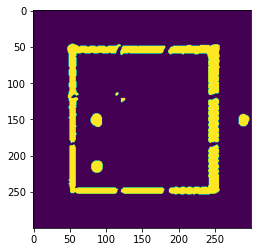

In [129]:
### エリア内のブロックの検出 300×300の場合
def detect_block(img, point):
    block_color = [0 for i in param.BLOCK_POS] #0:無, 1:赤, 2:緑, 3:青, 4:黄色

    #画像の平滑化
    size = 4
    kernel = np.ones((size, size),np.float32) / (size**2)
    blurred_img = cv2.filter2D(img,-1,kernel)

    #マスク
    red_bit1 = img_mask(blurred_img, param.RED_BLOCK_MIN_THRESHOLD1, param.RED_BLOCK_MAX_THRESHOLD1)
    red_bit2 = img_mask(blurred_img, param.RED_BLOCK_MIN_THRESHOLD2, param.RED_BLOCK_MAX_THRESHOLD2)
    red_bit = red_bit1 | red_bit2
    green_bit = img_mask(blurred_img, param.GREEN_BLOCK_MIN_THRESHOLD, param.GREEN_BLOCK_MAX_THRESHOLD)
    blue_bit = img_mask(blurred_img, param.BLUE_BLOCK_MIN_THRESHOLD, param.BLUE_BLOCK_MAX_THRESHOLD)
    yellow_bit = img_mask(blurred_img, param.YELLOW_BLOCK_MIN_THRESHOLD, param.YELLOW_BLOCK_MAX_THRESHOLD)

    #検知
    for i, a in enumerate(param.BLOCK_POS):
        if(red_bit[a[1]][a[0]] == 255):
            block_color[i] = 1
        if(green_bit[a[1]][a[0]] == 255):
            block_color[i] = 2
        if(blue_bit[a[1]][a[0]] == 255):
            block_color[i] = 3
        if(yellow_bit[a[1]][a[0]] == 255):
            block_color[i] = 4
    
    block_color[4] = 0

    #ブロックの数が正しいか
    success = False
    if(block_color.count(1) == 3 and block_color.count(2) == 3 and block_color.count(3) == 3 and block_color.count(4) == 3):
        success = True

    plt.imshow(np.array(green_bit))
    return block_color, success

img = cv2.imread("a.png")
param = option()
detect_block(img, 0)
    